## Importing Libraries

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense , Input , Dropout
from keras.regularizers import l1 , l2
from keras.callbacks import EarlyStopping

## Importing Make circle dataset

In [6]:
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

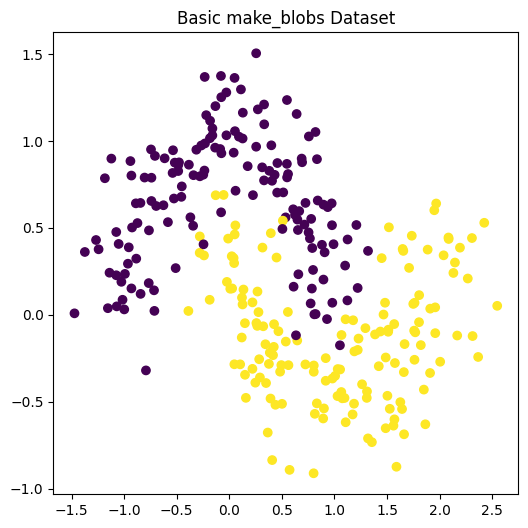

In [7]:
# Visualize
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.title("Basic make_blobs Dataset")
plt.show()

## Plot Decision Boundary

In [26]:
def PlotDecisionBoundary(X, y, model):

    # Create mesh grid using X (not X_train)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    # Prepare grid
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict probabilities
    grid_scaled = scaler.transform(grid)
    Z = model.predict(grid_scaled, verbose=0)

    # Convert to class labels
    Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

## Overfitted Model

In [20]:
model = Sequential([
  Input(shape=(2,)),
  Dense(256 , activation='relu'),
  Dense(128 , activation='relu'),
  Dense(64 , activation='relu'),
  Dense(32 , activation='relu'),
  Dense(16 , activation='relu'),
  Dense(1 , activation='sigmoid')
])

In [21]:
model.compile(optimizer='adam' , metrics=["accuracy"], loss='binary_crossentropy')

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,545 (174.00 KB)

 Trainable params: 44,545 (174.00 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(X_train , y_train , epochs=300 , validation_split=0.2)

Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.7906 - loss: 0.6543 - val_accuracy: 0.8571 - val_loss: 0.5635
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8379 - loss: 0.5466 - val_accuracy: 0.8810 - val_loss: 0.4355
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8565 - loss: 0.4207 - val_accuracy: 0.8571 - val_loss: 0.3250
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8680 - loss: 0.3098 - val_accuracy: 0.8333 - val_loss: 0.2889
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8501 - loss: 0.3128 - val_accuracy: 0.8571 - val_loss: 0.2725
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8586 - loss: 0.3335 - val_accuracy: 0.8810 - val_loss: 0.2561
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8687 - loss: 0.3088 - val_accuracy: 0.8810 - val_loss: 0.2525
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8438 - loss: 0.3319 - val_accuracy: 0.9048 - val_loss:

Text(0.5, 0, 'Epoch')

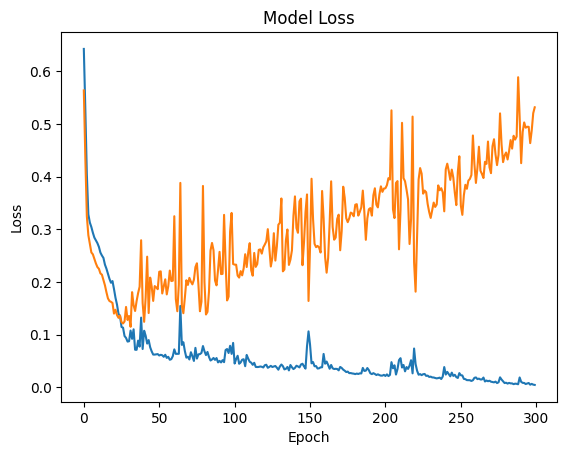

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [25]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


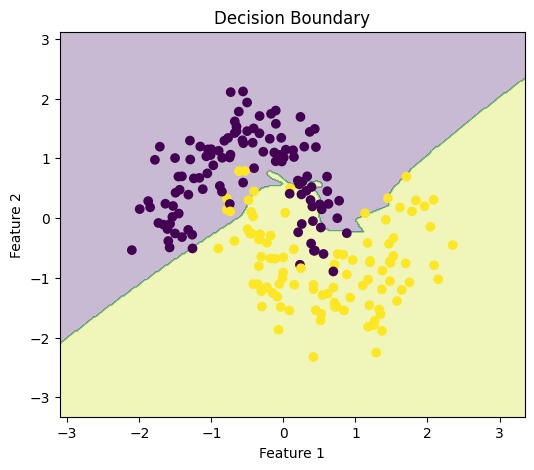

In [30]:
PlotDecisionBoundary(X_train, y_train, model)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Flatten if needed
y_pred = y_pred.reshape(-1)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1 Score :", f1)

Accuracy : 0.9666666666666667
Precision: 0.9622641509433962
Recall   : 0.9807692307692307
F1 Score : 0.9714285714285714


# Dropout Layer

In [33]:
model = Sequential([
  Input(shape=(2,)),
  Dense(256 , activation='relu'),
  Dropout(0.5),
  Dense(128 , activation='relu'),
  Dropout(0.4),
  Dense(64 , activation='relu'),
  Dropout(0.4),
  Dense(32 , activation='relu'),
  Dropout(0.3),
  Dense(16 , activation='relu'),
  Dropout(0.3),
  Dense(1 , activation='sigmoid')
])

In [34]:
model.compile(optimizer='adam' , metrics=["accuracy"], loss='binary_crossentropy')

In [35]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,545 (174.00 KB)

 Trainable params: 44,545 (174.00 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(X_train , y_train , epochs=300 , validation_split=0.2)

Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.4880 - loss: 0.7220 - val_accuracy: 0.8571 - val_loss: 0.6603
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5463 - loss: 0.6449 - val_accuracy: 0.8810 - val_loss: 0.6253
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5672 - loss: 0.6389 - val_accuracy: 0.8810 - val_loss: 0.5773
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6530 - loss: 0.6001 - val_accuracy: 0.8810 - val_loss: 0.5229
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7178 - loss: 0.5617 - val_accuracy: 0.8810 - val_loss: 0.4722
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6631 - loss: 0.5467 - val_accuracy: 0.8810 - val_loss: 0.4353
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6686 - loss: 0.5255 - val_accuracy: 0.8810 - val_loss: 0.4069
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7568 - loss: 0.5083 - val_accuracy: 0.8810 - val_loss:

Text(0.5, 0, 'Epoch')

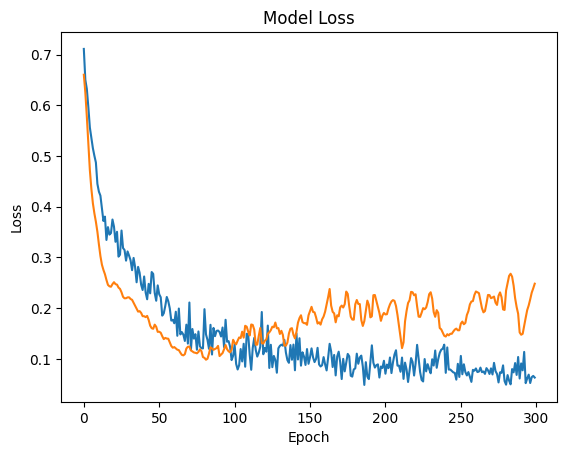

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [38]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


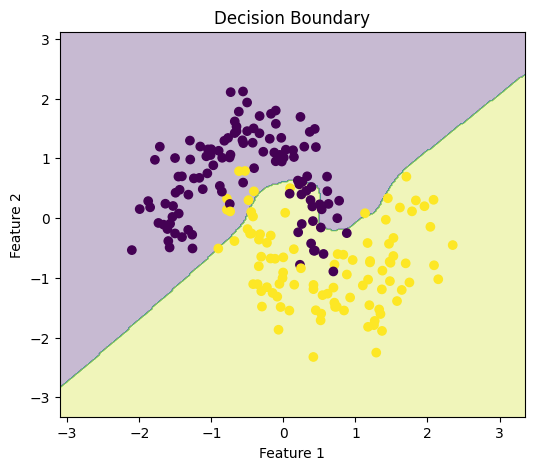

In [39]:
PlotDecisionBoundary(X_train, y_train, model)

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Flatten if needed
y_pred = y_pred.reshape(-1)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1 Score :", f1)

Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0


# Regularization (L1)

In [62]:
model = Sequential([
  Input(shape=(2,)),
  Dense(256 , activation='relu', kernel_regularizer=l1(0.0005)),
  Dropout(0.5),
  Dense(128 , activation='relu' , kernel_regularizer=l1(0.0005)),
  Dropout(0.4),
  Dense(64 , activation='relu', kernel_regularizer=l1(0.0005)),
  Dropout(0.4),
  Dense(32 , activation='relu', kernel_regularizer=l1(0.0005)),
  Dropout(0.3),
  Dense(16 , activation='relu', kernel_regularizer=l1(0.0005)),
  Dropout(0.3),
  Dense(1 , activation='sigmoid')
])

In [63]:
model.compile(optimizer='adam' , metrics=["accuracy"], loss='binary_crossentropy')

In [64]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,545 (174.00 KB)

 Trainable params: 44,545 (174.00 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
history = model.fit(X_train , y_train , epochs=300 , validation_split=0.2)

Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.4609 - loss: 2.2721 - val_accuracy: 0.6667 - val_loss: 2.2017
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5757 - loss: 2.1834 - val_accuracy: 0.7857 - val_loss: 2.1256
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6478 - loss: 2.0921 - val_accuracy: 0.8095 - val_loss: 2.0441
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7532 - loss: 2.0107 - val_accuracy: 0.8095 - val_loss: 1.9541
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7162 - loss: 1.9304 - val_accuracy: 0.8095 - val_loss: 1.8532
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7845 - loss: 1.8161 - val_accuracy: 0.8571 - val_loss: 1.7423
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7225 - loss: 1.7708 - val_accuracy: 0.8333 - val_loss: 1.6312
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7580 - loss: 1.6795 - val_accuracy: 0.8333 - val_loss:

Text(0.5, 0, 'Epoch')

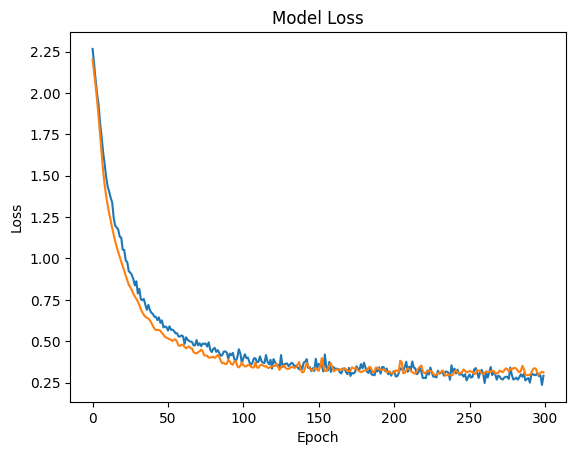

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [67]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


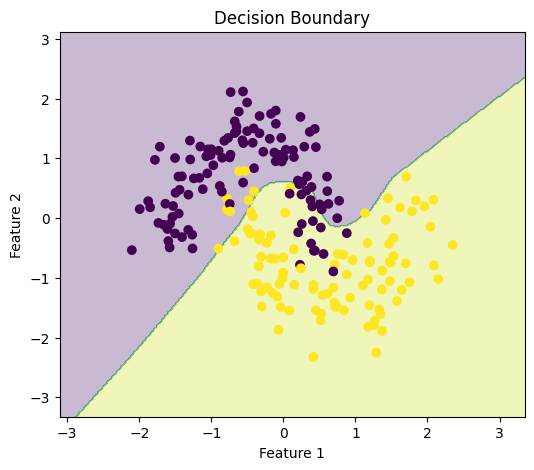

In [68]:
PlotDecisionBoundary(X_train, y_train, model)

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Flatten if needed
y_pred = y_pred.reshape(-1)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1 Score :", f1)

Accuracy : 0.9888888888888889
Precision: 1.0
Recall   : 0.9807692307692307
F1 Score : 0.9902912621359223


# Regularization (L2)

In [70]:
model = Sequential([
  Input(shape=(2,)),
  Dense(256 , activation='relu', kernel_regularizer=l2(0.001)),
  Dropout(0.5),
  Dense(128 , activation='relu', kernel_regularizer=l2(0.001)),
  Dropout(0.4),
  Dense(64 , activation='relu', kernel_regularizer=l2(0.001)),
  Dropout(0.4),
  Dense(32 , activation='relu', kernel_regularizer=l2(0.001)),
  Dropout(0.3),
  Dense(16 , activation='relu', kernel_regularizer=l2(0.001)),
  Dropout(0.3),
  Dense(1 , activation='sigmoid')
])

In [71]:
model.compile(optimizer='adam' , metrics=["accuracy"], loss='binary_crossentropy')

In [72]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,545 (174.00 KB)

 Trainable params: 44,545 (174.00 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
history = model.fit(X_train , y_train , epochs=300 , validation_split=0.2)

Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - accuracy: 0.5197 - loss: 1.0013 - val_accuracy: 0.8571 - val_loss: 0.9656
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6998 - loss: 0.9691 - val_accuracy: 0.8571 - val_loss: 0.9259
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6068 - loss: 0.9454 - val_accuracy: 0.8333 - val_loss: 0.8750
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6840 - loss: 0.8903 - val_accuracy: 0.8333 - val_loss: 0.8085
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7693 - loss: 0.8373 - val_accuracy: 0.8333 - val_loss: 0.7300
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8401 - loss: 0.7495 - val_accuracy: 0.8333 - val_loss: 0.6545
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8360 - loss: 0.6929 - val_accuracy: 0.8571 - val_loss: 0.5969
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8527 - loss: 0.6479 - val_accuracy: 0.8571 - val_loss

Text(0.5, 0, 'Epoch')

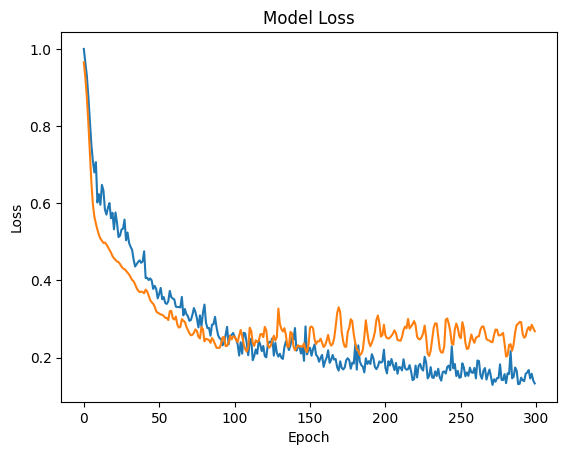

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [75]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


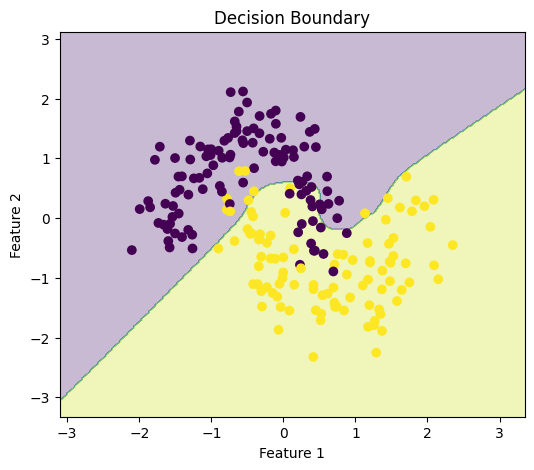

In [76]:
PlotDecisionBoundary(X_train, y_train, model)

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Flatten if needed
y_pred = y_pred.reshape(-1)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1 Score :", f1)

Accuracy : 0.9888888888888889
Precision: 0.9811320754716981
Recall   : 1.0
F1 Score : 0.9904761904761905


# Early Stopping

In [89]:
# model = Sequential([
#   Input(shape=(2,)),
#   Dense(256 , activation='relu', kernel_regularizer=l2(0.001)),
#   Dropout(0.5),
#   Dense(128 , activation='relu', kernel_regularizer=l2(0.001)),
#   Dropout(0.4),
#   Dense(64 , activation='relu', kernel_regularizer=l2(0.001)),
#   Dropout(0.4),
#   Dense(32 , activation='relu', kernel_regularizer=l2(0.001)),
#   Dropout(0.3),
#   Dense(16 , activation='relu', kernel_regularizer=l2(0.001)),
#   Dropout(0.3),
#   Dense(1 , activation='sigmoid')
# ])

model = Sequential([
  Input(shape=(2,)),
  Dense(256 , activation='relu'),
  Dropout(0.5),
  Dense(128 , activation='relu'),
  Dropout(0.4),
  Dense(64 , activation='relu'),
  Dropout(0.4),
  Dense(32 , activation='relu'),
  Dropout(0.3),
  Dense(16 , activation='relu'),
  Dropout(0.3),
  Dense(1 , activation='sigmoid')
])

In [90]:
model.compile(optimizer='adam' , metrics=["accuracy"], loss='binary_crossentropy')

In [91]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,545 (174.00 KB)

 Trainable params: 44,545 (174.00 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
callbacks = EarlyStopping(
    monitor='val_loss',
    min_delta=0.000001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [93]:
history = model.fit(X_train , y_train , epochs=300 , validation_split=0.2, callbacks=callbacks)

Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.5008 - loss: 0.6861 - val_accuracy: 0.8333 - val_loss: 0.6400
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6174 - loss: 0.6549 - val_accuracy: 0.8810 - val_loss: 0.5969
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6283 - loss: 0.6186 - val_accuracy: 0.8810 - val_loss: 0.5525
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7200 - loss: 0.5814 - val_accuracy: 0.8810 - val_loss: 0.4960
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7738 - loss: 0.5082 - val_accuracy: 0.8571 - val_loss: 0.4289
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8042 - loss: 0.4857 - val_accuracy: 0.8571 - val_loss: 0.3656
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8146 - loss: 0.4610 - val_accuracy: 0.8333 - val_loss: 0.3220
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8685 - loss: 0.3641 - val_accuracy: 0.8571 - val_loss:

Text(0.5, 0, 'Epoch')

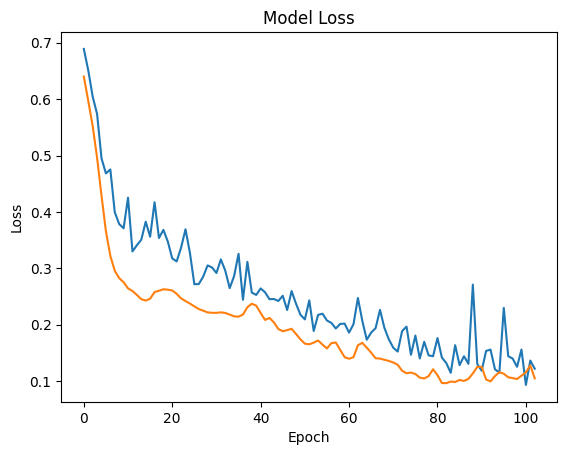

In [94]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [95]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


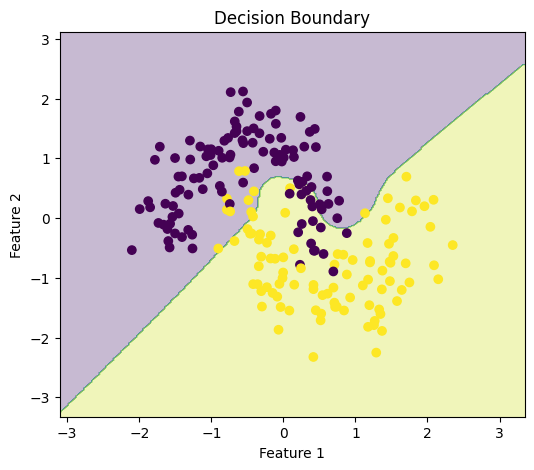

In [96]:
PlotDecisionBoundary(X_train, y_train, model)

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Flatten if needed
y_pred = y_pred.reshape(-1)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1 Score :", f1)

Accuracy : 0.9888888888888889
Precision: 0.9811320754716981
Recall   : 1.0
F1 Score : 0.9904761904761905
